In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [3]:
# https://lsjsj92.tistory.com/218

import calendar

print(calendar.calendar(2020))

                                  2020

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                      1  2                         1
 6  7  8  9 10 11 12       3  4  5  6  7  8  9       2  3  4  5  6  7  8
13 14 15 16 17 18 19      10 11 12 13 14 15 16       9 10 11 12 13 14 15
20 21 22 23 24 25 26      17 18 19 20 21 22 23      16 17 18 19 20 21 22
27 28 29 30 31            24 25 26 27 28 29         23 24 25 26 27 28 29
                                                    30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                   1  2  3       1  2  3  4  5  6  7
 6  7  8  9 10 11 12       4  5  6  7  8  9 10       8  9 10 11 12 13 14
13 14 15 16 17 18 19      11 12 13 14 15 16 17      15 16 17 18 19 20 21
20 21 22 23 24 25 26      18 19 20 21 22 

# Data Generation

In [3]:
from datetime import datetime, timedelta

time_init = datetime(2020, 1, 1)
print(f"1. time_init = {time_init}")

time_init_str = time_init.strftime('%Y-%m-%d')
print(f"2. time_init(str) = {time_init_str}")

time_init_datetime = datetime.strptime(time_init_str, "%Y-%m-%d")
print(f"3. time_init(datetime) = {time_init_datetime}")

time_init_weekday = time_init.weekday()
print(f"4. time_init(weekday) = {time_init_weekday}")

1. time_init = 2020-01-01 00:00:00
2. time_init(str) = 2020-01-01
3. time_init(datetime) = 2020-01-01 00:00:00
4. time_init(weekday) = 2


In [4]:
dt = timedelta(days=59)
time_59 = time_init + dt
print(f"5. time_59 = {datetime.strftime(time_59,'%Y-%m-%d')}")

5. time_59 = 2020-02-29


In [5]:
dates = []
for i in range(366):
    date = time_init + timedelta(days=i)
    dates.append(date.strftime('%Y-%m-%d'))
    
y2020 = pd.DataFrame({"거래일자": dates})
y2020.head()

,거래일자
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


## 근로소득

### 회사
> **기본급:** 월 200만원  
> **출장비:** 일비 3만원, 교통비 3만원  
> **성과급:** 건당 1천만원 

* 수입 (1) 월급 - 200만원

In [6]:
y2020["입금액"] = np.nan

# 월급날 = 21일
idx_salary0 = y2020.loc[y2020["거래일자"].str.split("-").str[-1]=="21"].index
idx_salary0

Int64Index([20, 51, 80, 111, 141, 172, 202, 233, 264, 294, 325, 355], dtype='int64')

In [7]:
salary_w = y2020["거래일자"].loc[idx_salary0].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())
print(f"salary_w.weekday = {salary_w.to_numpy()}")

salary_w.weekday = [1 4 5 1 3 6 1 4 0 2 5 0]


In [8]:
idx_salary = np.where(salary_w > 4, salary_w.index-(salary_w-4), salary_w.index)
idx_salary

array([ 20,  51,  79, 111, 141, 170, 202, 233, 264, 294, 324, 355])

In [9]:
salary = 2e6
y2020.loc[idx_salary, "입금액"] = [f"{int(x):d}" for x in salary*(1 + 0.1*np.random.uniform(size=len(idx_salary)).round(3))]
y2020.loc[idx_salary, "적요"] = [f"우리회사_{i+1:02d}" for i in range(len(idx_salary))]

In [10]:
y2020.loc[18:23]

,거래일자,입금액,적요
18,2020-01-19,NaN,NaN
19,2020-01-20,NaN,NaN
20,2020-01-21,2111400,우리회사_01
21,2020-01-22,NaN,NaN
22,2020-01-23,NaN,NaN
23,2020-01-24,NaN,NaN


* 수입 (2) 출장비 - 1년에 50번
> **하루 1회 출장 :** 갈때 교통비 3만 + 일비 3만 + 올때 교통비 3만 = **9만원**  
> **하루 n회 출장 :** 갈때 교통비 3만 + 일비 3만 + 이동 교통비 (n-1)\*3만  + 올때 교통비 3만 = **(n+2) * 3만원**  

In [11]:
weekday = y2020["거래일자"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())
workday = weekday[weekday < 5].index
weekend = weekday[weekday > 4].index

In [12]:
idx_biztrip0 = np.random.choice(workday, size=50)
idx_biztrip0

array([ 86, 232,  12,  30, 254, 310,  50, 145, 160, 222, 244, 349, 181,
        79,  49,  99,  20,  79, 155, 338, 223, 225,   7,   9, 225, 226,
       274, 103, 356, 226, 118, 205, 174, 155, 285,  83,  82, 159,  36,
        44, 110, 286, 104, 323, 330,  15, 126, 119,  16, 260])

In [13]:
idx_biztrip, num_biztrip = np.unique(idx_biztrip0, return_counts=True)

print(f"출장일 = {y2020.loc[idx_biztrip, '거래일자'].values}")
print(f"하루 출장횟수 = {num_biztrip}")
pay_biz = [f"{30000*(n+2):d}" for n in num_biztrip]
print(f"출장비 = {pay_biz}")

출장일 = ['2020-01-08' '2020-01-10' '2020-01-13' '2020-01-16' '2020-01-17'
 '2020-01-21' '2020-01-31' '2020-02-06' '2020-02-14' '2020-02-19'
 '2020-02-20' '2020-03-20' '2020-03-23' '2020-03-24' '2020-03-27'
 '2020-04-09' '2020-04-13' '2020-04-14' '2020-04-20' '2020-04-28'
 '2020-04-29' '2020-05-06' '2020-05-25' '2020-06-04' '2020-06-08'
 '2020-06-09' '2020-06-23' '2020-06-30' '2020-07-24' '2020-08-10'
 '2020-08-11' '2020-08-13' '2020-08-14' '2020-08-20' '2020-09-01'
 '2020-09-11' '2020-09-17' '2020-10-01' '2020-10-12' '2020-10-13'
 '2020-11-06' '2020-11-19' '2020-11-26' '2020-12-04' '2020-12-15'
 '2020-12-22']
하루 출장횟수 = [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1]
출장비 = ['90000', '90000', '90000', '90000', '90000', '90000', '90000', '90000', '90000', '90000', '90000', '120000', '90000', '90000', '90000', '90000', '90000', '90000', '90000', '90000', '90000', '90000', '90000', '120000', '90000', '90000', '90000', '90000', '90000', '90000', '

In [14]:
(set(idx_biztrip) & set(idx_salary))

{20, 79}

In [15]:
def put_income(df, idx_pay, pay, label):
    
    for i, idx in enumerate(idx_pay):
        if df["입금액"].isnull()[idx]:
            df.loc[idx, "입금액"] = pay[i]
            
            label_note = f"{label}_{(i+1):03d}"
            df.at[idx, "적요"] = label_note
                
        else:
            income = df.loc[idx, "입금액"]
            note = df.loc[idx, "적요"]
            
            if not isinstance(income, list):
                income = [income]
                note = [note]
            df.at[idx, "입금액"] = income + [pay[i]]
            
            label_note = f"{label}_{(i+1):03d}"
            df.at[idx, "적요"] = note + [label_note]

    return df

In [16]:
y2020 = put_income(y2020, idx_biztrip, pay_biz, "출장")

In [24]:
y2020.loc[79:82]

,거래일자,입금액,적요
79,2020-03-20,"[2051000, 120000]","[우리회사_03, 출장_012]"
80,2020-03-21,NaN,NaN
81,2020-03-22,NaN,NaN
82,2020-03-23,90000,출장_013


* 수입 (3) 인센티브 - 1년에 최대 5번
> N회째 계약 성공 확률 = $0.7^N$  
> 1회 계약시 인센티브 1천만원

In [18]:
num_success = 0
count = 0
result = 1

while count < 5 and result == 1:
    p_success = np.power(0.7, (count+1))
    result = np.random.choice([0, 1], p=[1-p_success, p_success])
    count += result

print(f"계약 성공 횟수 = {count}")

계약 성공 횟수 = 3


In [19]:
idx_success = np.random.choice(workday, count)
idx_success

array([ 30, 212, 275])

In [20]:
def put_income(df, idx_pay, pay, label, number=True):
    
    for i, idx in enumerate(idx_pay):
        if df["입금액"].isnull()[idx]:
            df.loc[idx, "입금액"] = pay[i]
            
            label_note = f"{label}"
            if number:
                label_note += f"_{(i+1):03d}"
            df.at[idx, "적요"] = label_note
                
        else:
            income = df.loc[idx, "입금액"]
            note = df.loc[idx, "적요"]
            
            if not isinstance(income, list):
                income = [income]
                note = [note]
            df.at[idx, "입금액"] = income + [pay[i]]
            
            label_note = f"{label}"
            if number:
                label_note += f"_{(i+1):03d}"
            df.at[idx, "적요"] = note + [label_note]
            
    return df


In [21]:
print(set(idx_biztrip) & set(idx_success))
print(set(idx_salary) & set(idx_success))

{30}
set()


In [25]:
y2020 = put_income(y2020, idx_success, ["10000000"]*len(idx_success), "성과급", number=False)
y2020.loc[30]

거래일자           2020-01-31
입금액     [90000, 10000000]
적요          [출장_007, 성과급]
Name: 30, dtype: object

In [26]:
y2020.to_pickle("y2020.pkl")

In [28]:
y2020.dropna().head(10)

,거래일자,입금액,적요
7,2020-01-08,90000,출장_001
9,2020-01-10,90000,출장_002
12,2020-01-13,90000,출장_003
15,2020-01-16,90000,출장_004
16,2020-01-17,90000,출장_005
20,2020-01-21,"[2111400, 90000]","[우리회사_01, 출장_006]"
30,2020-01-31,"[90000, 10000000]","[출장_007, 성과급]"
36,2020-02-06,90000,출장_008
44,2020-02-14,90000,출장_009
49,2020-02-19,90000,출장_010


### 투잡
> **기본급:** 없음  
> **출장비:** 없음  
> **컨텐츠 제작비:** 건당 10만원 (출장 없는 날). **2차 창작:** 100만원(1% 확률)

In [84]:
y2020 = pd.read_pickle("y2020.pkl")

In [85]:
idx_twojob_max = np.array(list(set(y2020.index) - set(idx_biztrip)))
len(idx_twojob_max)

320

In [86]:
num_twojob = int(np.random.normal(loc=0.5*len(idx_twojob_max*0.6), scale=30, size=1))
num_twojob

142

In [87]:
num_twojob/len(idx_twojob_max)

0.44375

In [88]:
idx_twojob = np.random.choice(idx_twojob_max, size=num_twojob, replace=False)
idx_twojob.sort()


In [89]:
# twojob
y2020 = put_income(y2020, idx_twojob, [100000]*num_twojob, "OO컨텐츠", number=False)
y2020.head(10)

,거래일자,입금액,적요
0,2020-01-01,100000,OO컨텐츠
1,2020-01-02,NaN,NaN
2,2020-01-03,NaN,NaN
3,2020-01-04,100000,OO컨텐츠
4,2020-01-05,NaN,NaN
5,2020-01-06,NaN,NaN
6,2020-01-07,NaN,NaN
7,2020-01-08,90000,출장_001
8,2020-01-09,NaN,NaN
9,2020-01-10,90000,출장_002


In [90]:
# 2차 창작
idx_2nd_ = np.random.choice([0, 1], size=num_twojob, p=[0.99, 0.01])
idx_2nd = np.where(idx_2nd_==1)[0]
print(idx_2nd)
idx_2nd += 7

[60 70 93]


In [91]:
def put_income(df, idx_pay, pay, label, number=True):
    
    for i, idx in enumerate(idx_pay):
        if df["입금액"].isnull()[idx]:
            df.loc[idx, "입금액"] = pay[i]
            
            if isinstance(label, str):
                label_note = f"{label}"
                if number:
                    label_note += f"_{(i+1):03d}"
                df.at[idx, "적요"] = label_note
                
            # label이 list로 들어오는 경우
            else:
                df.at[idx, "적요"] = label[i]
                
        else:
            income = df.loc[idx, "입금액"]
            note = df.loc[idx, "적요"]
            
            if not isinstance(income, list):
                income = [income]
                note = [note]
            df.at[idx, "입금액"] = income + [pay[i]]
            
            if isinstance(label, str):
                label_note = f"{label}"
                if number:
                    label_note += f"_{(i+1):03d}"
                df.at[idx, "적요"] = note + [label_note]
                
            # label이 list로 들어오는 경우
            else:
                df.at[idx, "적요"] = note + [label[i]]

    return df

In [98]:
# 2nd
num_idx_2nd = len(idx_2nd)
y2020 = put_income(y2020, idx_2nd, [1000000]*num_idx_2nd, np.random.choice(["계약금_출판", "출연료", "저작권료"], size=num_idx_2nd), number=False)

In [100]:
y2020.loc[[67, 77, 100]]

,거래일자,입금액,적요
67,2020-03-08,"[100000, 1000000]","[OO컨텐츠, 출연료]"
77,2020-03-18,1000000,출연료
100,2020-04-10,"[100000, 1000000]","[OO컨텐츠, 계약금_출판]"


## 기타 입금

In [101]:
# 신용카드 환불
credit_num = 200
idx_credit = np.random.choice(workday, credit_num)
credit_cards = np.random.choice(["AA카드", "BB카드",  "CC카드", "DD카드", "EE카드", "결제환급", "XX마트"], credit_num)
credit_refunds = [int(500 + 300* (np.random.random()-0.5))*100 for _ in range(credit_num)]

# 자녀 용돈
breed_num = 20
idx_breed = np.random.choice(weekend, breed_num)
breed_persons = np.random.choice(["할아버지할머니", "삼촌숙모", "이모이모부", "고모고모부", "이웃어른"], breed_num)
breed_moneys = np.random.choice([10000, 30000, 50000], size=breed_num)

In [32]:
from copy import deepcopy

def put_income(df, idx_label, pay, label):
    df_ = deepcopy(df)
    
    for i, idx in enumerate(idx_label):
        if df_["입금액"].isnull()[idx]:
            df_.loc[idx, "입금액"] = pay[i]
            
            if isinstance(label, str):
                df_.at[idx, "적요"] = f"{label}_{i:03d}"
            else:
                df_.at[idx, "적요"] = label[i]
                
        else:
            income = df_.loc[idx, "입금액"]
            note = df_.loc[idx, "적요"]
            
            if not isinstance(income, list):
                income = [income]
                note = [note]
            df_.at[idx, "입금액"] = income + [pay[i]]
            
            if isinstance(label, str):
                df_.at[idx, "적요"] = note + [f"{label}_{i:03d}"]
            else:
                df_.at[idx, "적요"] = note + [label[i]]

    return df_

In [105]:
y2020 = put_income(y2020, idx_credit, credit_refunds, credit_cards, number=False)

In [106]:
y2020 = put_income(y2020, idx_breed, breed_moneys, breed_persons, number=False)

In [108]:
y2020.loc[95:105]

,거래일자,입금액,적요
95,2020-04-05,NaN,NaN
96,2020-04-06,"[100000, 51500]","[OO컨텐츠, DD카드]"
97,2020-04-07,100000,OO컨텐츠
98,2020-04-08,100000,OO컨텐츠
99,2020-04-09,90000,출장_016
100,2020-04-10,"[100000, 1000000]","[OO컨텐츠, 계약금_출판]"
101,2020-04-11,NaN,NaN
102,2020-04-12,100000,OO컨텐츠
103,2020-04-13,90000,출장_017
104,2020-04-14,"[90000, 52300, 62300, 41200]","[출장_018, 결제환급, AA카드, AA카드]"


## 정리 : 무입금일 제거

In [111]:
y2020 = y2020.dropna()
y2020

,거래일자,입금액,적요
0,2020-01-01,"[100000, 58300, 54200]","[OO컨텐츠, XX마트, BB카드]"
1,2020-01-02,37900,EE카드
3,2020-01-04,100000,OO컨텐츠
5,2020-01-06,42600,결제환급
7,2020-01-08,"[90000, 50500]","[출장_001, DD카드]"
...,...,...,...
360,2020-12-26,"[100000, 30000]","[OO컨텐츠, 이모이모부]"
362,2020-12-28,59800,BB카드
363,2020-12-29,"[56700, 56300]","[CC카드, BB카드]"
364,2020-12-30,100000,OO컨텐츠


In [112]:
y2020 = pd.concat([y2020[["거래일자", "입금액"]].explode("입금액"), y2020["적요"].explode()], axis=1).reset_index(drop=True)
y2020

,거래일자,입금액,적요
0,2020-01-01,100000,OO컨텐츠
1,2020-01-01,58300,XX마트
2,2020-01-01,54200,BB카드
3,2020-01-02,37900,EE카드
4,2020-01-04,100000,OO컨텐츠
...,...,...,...
421,2020-12-28,59800,BB카드
422,2020-12-29,56700,CC카드
423,2020-12-29,56300,BB카드
424,2020-12-30,100000,OO컨텐츠


In [121]:
y2020["입금액"] = y2020["입금액"].astype(int)
print("총 입금액 =", format(y2020['입금액'].sum(), ','))

총 입금액 = 87,112,099


In [122]:
y2020.to_excel("58_income.xlsx", index=False)

# Extract Income from Company

In [4]:
y2020 = pd.read_excel("58_income.xlsx")

In [5]:
y2020.head(20)

,거래일자,입금액,적요
0,2020-01-01,100000,OO컨텐츠
1,2020-01-01,58300,XX마트
2,2020-01-01,54200,BB카드
3,2020-01-02,37900,EE카드
4,2020-01-04,100000,OO컨텐츠
5,2020-01-06,42600,결제환급
6,2020-01-08,90000,출장_001
7,2020-01-08,50500,DD카드
8,2020-01-10,90000,출장_002
9,2020-01-10,57900,BB카드


In [6]:
y2020["입금액"].sum()

87112099

In [7]:
format(y2020["입금액"].sum(), ",")

'87,112,099'

In [8]:
y2020_company = y2020.loc[y2020["적요"].str.contains("우리회사|출장|성과급|컨텐츠|출판|출연|저작권", regex=True)]
y2020_company["입금액"] = y2020_company["입금액"].astype(int)
y2020_company.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,거래일자,입금액,적요
0,2020-01-01,100000,OO컨텐츠
4,2020-01-04,100000,OO컨텐츠
6,2020-01-08,90000,출장_001
8,2020-01-10,90000,출장_002
10,2020-01-13,90000,출장_003


In [9]:
# 총 소득
format(y2020_company["입금액"].sum(), ",")

'76,530,399'

In [10]:
### 1. 회사
# salary
index_salary = y2020_company.loc[y2020_company["적요"].str.contains("우리회사", regex=False)].index

# business trip
index_biztrip = y2020_company.loc[y2020_company["적요"].str.contains("출장", regex=False)].index

# success
index_success = y2020_company.loc[y2020_company["적요"].str.contains("성과급", regex=False)].index

### 2. 투잡
# contents
index_contents = y2020_company.loc[y2020_company["적요"].str.contains("컨텐츠", regex=False)].index

# 2차 창작물
index_2nd = y2020_company.loc[y2020_company["적요"].str.contains("출판|출연|저작권", regex=True)].index

In [11]:
y2020_company["type"] = np.nan

y2020_company.loc[index_salary, "type"] = "기본급"
y2020_company.loc[index_biztrip, "type"] = "출장비"
y2020_company.loc[index_success, "type"] = "성과급"

y2020_company.loc[index_contents, "type"] = "컨텐츠"
y2020_company.loc[index_2nd, "type"] = "2차"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [12]:
y2020_g = y2020_company.groupby("type").sum()
y2020_g

,입금액
type,
2차,3000000
기본급,25070399
성과급,30000000
출장비,4260000
컨텐츠,14200000


In [13]:
y2020_g.loc[["기본급", "출장비", "성과급"]]

,입금액
type,
기본급,25070399
출장비,4260000
성과급,30000000


In [14]:
y2020_g.index

Index(['2차', '기본급', '성과급', '출장비', '컨텐츠'], dtype='object', name='type')

In [15]:
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

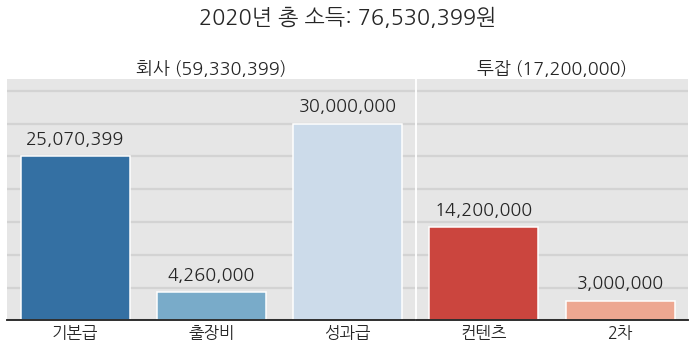

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), gridspec_kw={"width_ratios":[3,2], "wspace":0}, sharey=True)

def plot_income(df, idx, ax, palette="tab10", title=None):
    sns.barplot(x=idx, y="입금액", data=df.loc[idx], palette=palette, ax=ax, zorder=2)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.set_yticklabels([])

    ax.set_facecolor("0.9")
    [ax.spines[k].set_visible(False) for k in ["left", "top", "right"]]

    ax.tick_params(axis="both", length=0)
    [ax.axhline(y, zorder=1, c="lightgray") for y in yticks];

    for i, p in enumerate(ax.patches):
        h = p.get_height()
        ax.text(i, h+2e6, format(int(h), ","), ha="center")
        
    ax.set_title(f"{title} ({format(int(df.loc[idx].sum()), ',')})")
    return ax


idx_company = ["기본급", "출장비", "성과급"]
idx_2job = ["컨텐츠", "2차"]

axs[0] = plot_income(y2020_g, idx_company, axs[0], palette="Blues_r", title="회사")
axs[1] = plot_income(y2020_g, idx_2job, axs[1], palette="Reds_r", title="투잡")
axs[1].spines["left"].set_visible(True)
axs[1].spines["left"].set_color("w")

fig.suptitle(f"2020년 총 소득: {format(int(y2020_g.sum()), ',')}원")
fig.tight_layout()
fig.savefig("57_income.png")